In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from scipy.stats import mode

In [3]:
df = pd.read_excel("data/aggregateRockData.xlsx", header = None)
df.shape

(540, 14)

In [4]:
with open('data/feature_presence540.txt', 'r') as file:
    content = file.read()

lines = content.split("\n")[ : 540]
print(len(lines))

feats = pd.DataFrame(columns = ["feat_{0}".format(feat_num) for feat_num in range(1, 15)])

for line in lines:
    row = [x for x in line.split(" ") if x != ""][:14]

    feats.loc[len(feats)] = row

feats.head()

540


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14
0,1,1,1,0.20,0.15,0.00,0.00,0.00,0.05,0.00,0.30,0.00,0.00,0.10
1,2,1,2,0.65,0.15,0.00,0.00,0.05,0.00,0.00,0.10,0.00,0.05,0.05
2,3,1,3,0.60,0.00,0.00,0.00,0.05,0.00,0.00,0.35,0.00,0.00,0.05
3,4,1,4,0.10,0.85,0.00,0.00,0.05,0.00,0.00,0.10,0.00,0.00,0.10
4,5,1,5,0.35,0.80,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.00,0.05


In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,1,1,1,2,57,19,6,46,36,0.695122,0.231707,0.073171,0.560976
1,2,1,1,2,3,59,10,13,24,58,0.719512,0.121951,0.158537,0.292683
2,3,1,1,3,3,37,28,17,20,62,0.451220,0.341463,0.207317,0.243902
3,4,1,1,4,3,41,11,30,29,53,0.500000,0.134146,0.365854,0.353659
4,5,1,1,5,3,42,6,34,25,57,0.512195,0.073171,0.414634,0.304878


In [6]:
feats.dtypes

feat_1     object
feat_2     object
feat_3     object
feat_4     object
feat_5     object
feat_6     object
feat_7     object
feat_8     object
feat_9     object
feat_10    object
feat_11    object
feat_12    object
feat_13    object
feat_14    object
dtype: object

In [7]:
df.dtypes

0       int64
1       int64
2       int64
3       int64
4       int64
5       int64
6       int64
7       int64
8       int64
9       int64
10    float64
11    float64
12    float64
13    float64
dtype: object

In [8]:
col_dtype_dict = {
    "feat_1" : "int",
    "feat_2" : "int",
    "feat_3" : "int",
    "feat_4" : "float",
    "feat_5" : "float",
    "feat_6" : "float",
    "feat_7" : "float",
    "feat_8" : "float",
    "feat_9" : "float",
    "feat_10" : "float",
    "feat_11" : "float",
    "feat_12" : "float",
    "feat_13" : "float",
    "feat_14" : "float",
}

for col in feats.columns:
    feats[col] = feats[col].astype(col_dtype_dict[col])

feats.dtypes

feat_1       int64
feat_2       int64
feat_3       int64
feat_4     float64
feat_5     float64
feat_6     float64
feat_7     float64
feat_8     float64
feat_9     float64
feat_10    float64
feat_11    float64
feat_12    float64
feat_13    float64
feat_14    float64
dtype: object

In [9]:
feats

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14
0,1,1,1,0.20,0.15,0.00,0.00,0.00,0.05,0.00,0.30,0.0,0.00,0.10
1,2,1,2,0.65,0.15,0.00,0.00,0.05,0.00,0.00,0.10,0.0,0.05,0.05
2,3,1,3,0.60,0.00,0.00,0.00,0.05,0.00,0.00,0.35,0.0,0.00,0.05
3,4,1,4,0.10,0.85,0.00,0.00,0.05,0.00,0.00,0.10,0.0,0.00,0.10
4,5,1,5,0.35,0.80,0.00,0.00,0.00,0.00,0.00,0.10,0.0,0.00,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,716,28,18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.0,1.00,0.00
536,717,29,17,0.00,0.00,0.85,0.05,0.15,0.05,0.00,0.00,0.0,0.00,0.40
537,718,29,18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00
538,719,30,17,0.00,0.00,0.00,0.00,0.55,0.10,0.05,0.05,0.0,0.00,0.00


In [10]:
# Considering only the first 480 rows

df = df.iloc[ : 480, : ]
feats = feats.iloc[ : 480, : ]

print(df.shape)
print(feats.shape)

(480, 14)
(480, 14)


In [11]:
print(max(df[0]), min(df[0]))
print(max(feats['feat_1']), min(feats['feat_1']))

480 1
480 1


In [12]:
# Adding labels and features in the same dataframe.

data = pd.concat([feats, df[[1]]], axis = 1, ignore_index = True)

In [13]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,1,1,0.20,0.15,0.0,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10,1
1,2,1,2,0.65,0.15,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05,1
2,3,1,3,0.60,0.00,0.0,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05,1
3,4,1,4,0.10,0.85,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10,1
4,5,1,5,0.35,0.80,0.0,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,476,30,12,0.00,0.00,0.0,0.0,0.60,0.05,0.0,0.00,0.0,0.00,0.30,3
476,477,30,13,0.00,0.00,0.0,0.0,0.40,0.00,0.0,0.05,0.0,0.00,0.35,3
477,478,30,14,0.00,0.00,0.0,0.0,0.45,0.05,0.0,0.05,0.0,0.00,0.20,3
478,479,30,15,0.00,0.00,0.0,0.0,0.40,0.10,0.0,0.10,0.0,0.00,0.20,3


In [14]:
col_rename_dict = {
    0 : "Rock Number",
    1 : "Subtype number",
    2 : "Token number",
    3 : "Angular fragments",
    4 : "Rounded fragments",
    5 : "Straight stripes",
    6 : "Curved stripes",
    7 : "Physical layers",
    8 : "Veins",
    9 : "Oily/shimmery texture",
    10 : "Splotchy texture",
    11 : "Single translucent crystal",
    12 : "Multiple cubic crystals",
    13 : "Sandy texture",
    14 : "Label"
}

data = data.rename(columns = col_rename_dict)

In [15]:
data.head()

,Rock Number,Subtype number,Token number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Label
0,1,1,1,0.20,0.15,0.0,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10,1
1,2,1,2,0.65,0.15,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05,1
2,3,1,3,0.60,0.00,0.0,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05,1
3,4,1,4,0.10,0.85,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10,1
4,5,1,5,0.35,0.80,0.0,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05,1


In [16]:
data.describe()

,Rock Number,Subtype number,Token number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Label
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,240.500000,15.500000,8.500000,0.084479,0.080208,0.067729,0.042292,0.165146,0.052396,0.144479,0.141458,0.031667,0.025104,0.119854,2.000000
std,138.708327,8.664472,4.614582,0.193996,0.197648,0.194792,0.160970,0.216635,0.102676,0.265689,0.168222,0.135647,0.112153,0.173149,0.817348
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,120.750000,8.000000,4.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,240.500000,15.500000,8.500000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.050000,2.000000
75%,360.250000,23.000000,12.250000,0.050000,0.050000,0.000000,0.000000,0.212500,0.050000,0.100000,0.200000,0.000000,0.000000,0.150000,3.000000
max,480.000000,30.000000,16.000000,1.000000,1.000000,1.000000,1.000000,0.950000,0.900000,1.000000,0.950000,1.000000,1.000000,1.000000,3.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 479
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rock Number                 480 non-null    int64  
 1   Subtype number              480 non-null    int64  
 2   Token number                480 non-null    int64  
 3   Angular fragments           480 non-null    float64
 4   Rounded fragments           480 non-null    float64
 5   Straight stripes            480 non-null    float64
 6   Curved stripes              480 non-null    float64
 7   Physical layers             480 non-null    float64
 8   Veins                       480 non-null    float64
 9   Oily/shimmery texture       480 non-null    float64
 10  Splotchy texture            480 non-null    float64
 11  Single translucent crystal  480 non-null    float64
 12  Multiple cubic crystals     480 non-null    float64
 13  Sandy texture               480 non-null

In [18]:
data.isnull().sum()

Rock Number                   0
Subtype number                0
Token number                  0
Angular fragments             0
Rounded fragments             0
Straight stripes              0
Curved stripes                0
Physical layers               0
Veins                         0
Oily/shimmery texture         0
Splotchy texture              0
Single translucent crystal    0
Multiple cubic crystals       0
Sandy texture                 0
Label                         0
dtype: int64

In [19]:
data.dtypes

Rock Number                     int64
Subtype number                  int64
Token number                    int64
Angular fragments             float64
Rounded fragments             float64
Straight stripes              float64
Curved stripes                float64
Physical layers               float64
Veins                         float64
Oily/shimmery texture         float64
Splotchy texture              float64
Single translucent crystal    float64
Multiple cubic crystals       float64
Sandy texture                 float64
Label                           int64
dtype: object

In [20]:
features = list(data.columns)[3 : -1]
label = "Label"

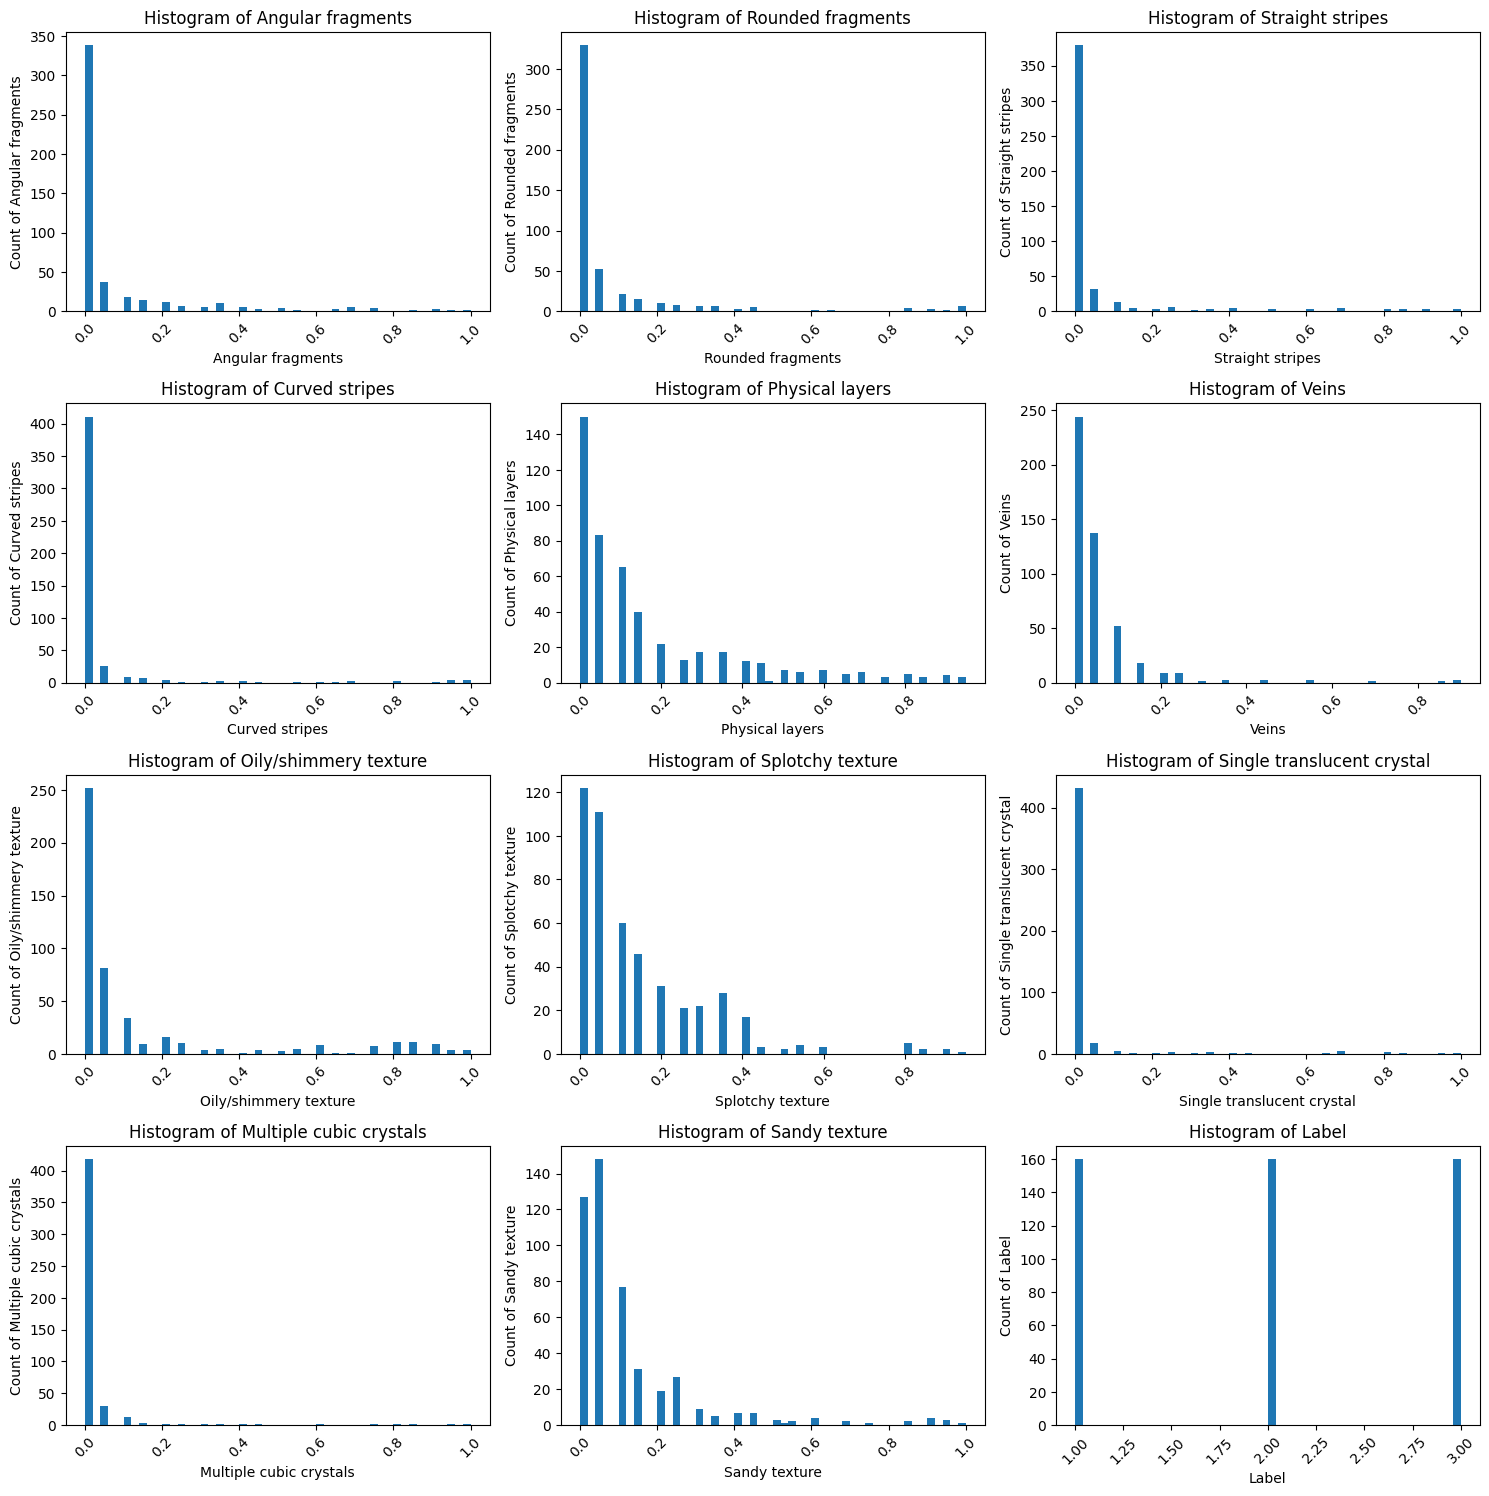

In [21]:
hist_cols = features + [label]

plt.figure(figsize = (15, 15))
for i in range(len(hist_cols)):
    col = hist_cols[i]

    plt.subplot(4, 3, i + 1)
    plt.hist(data[col], bins = 50)
    plt.xlabel(col)
    plt.ylabel("Count of {0}".format(col))
    plt.xticks(rotation = 45)
    plt.title("Histogram of {0}".format(col))
    # plt.show()

plt.tight_layout()

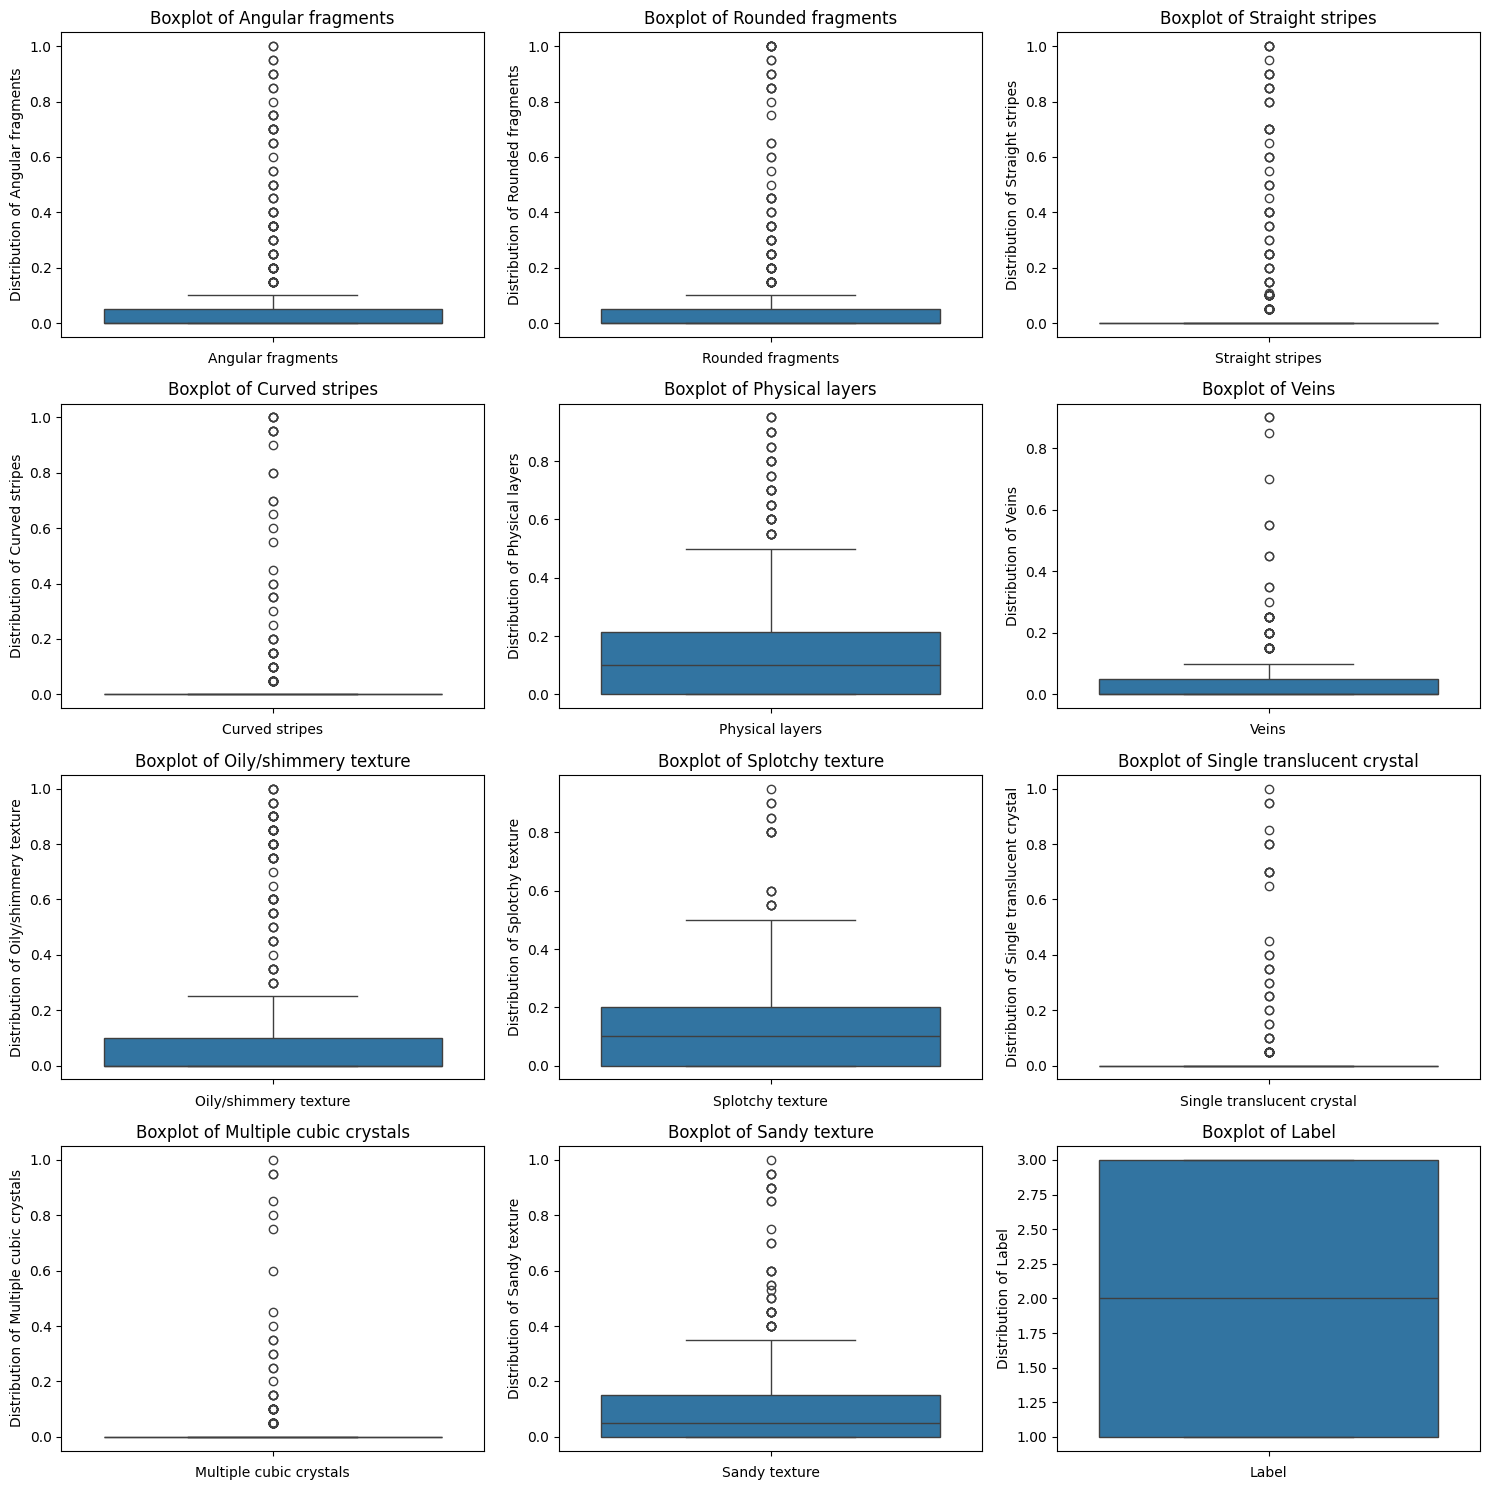

In [22]:
plt.figure(figsize = (15, 15))
for i in range(len(hist_cols)):
    col = hist_cols[i]

    plt.subplot(4, 3, i + 1)
    sns.boxplot(data[col])
    plt.xlabel(col)
    plt.ylabel("Distribution of {0}".format(col))
    plt.title("Boxplot of {0}".format(col))
    # plt.show()

plt.tight_layout()

In [23]:
hist_cols

['Angular fragments',
 'Rounded fragments',
 'Straight stripes',
 'Curved stripes',
 'Physical layers',
 'Veins',
 'Oily/shimmery texture',
 'Splotchy texture',
 'Single translucent crystal',
 'Multiple cubic crystals',
 'Sandy texture',
 'Label']

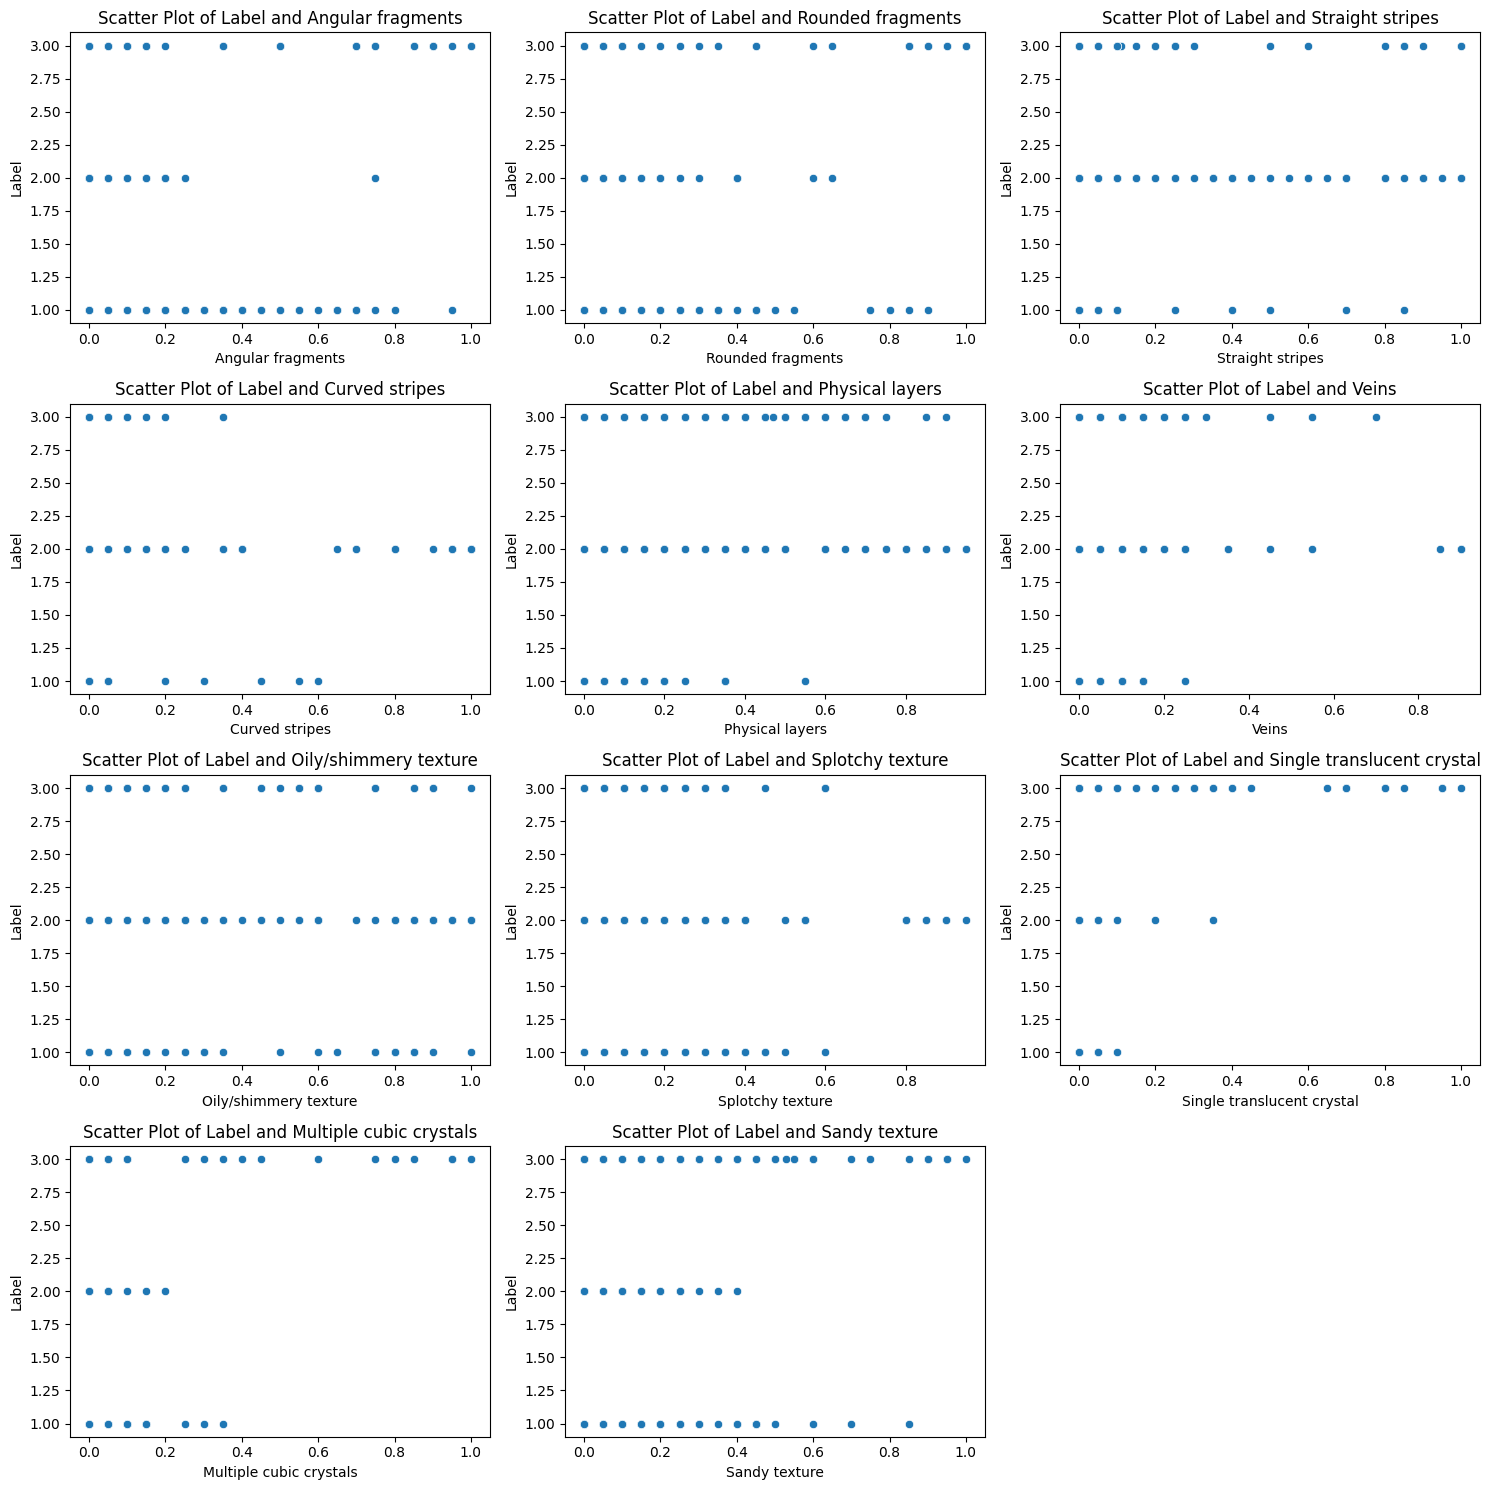

In [24]:
# Relationship between atributes - using scatterplots

continuous_features = [
    'Angular fragments',
    'Rounded fragments',
    'Straight stripes',
    'Curved stripes',
    'Physical layers',
    'Veins',
    'Oily/shimmery texture',
    'Splotchy texture',
    'Single translucent crystal',
    'Multiple cubic crystals',
    'Sandy texture'
]
target_col = "Label"

plt.figure(figsize = (15, 15))
for i in range(len(continuous_features)):
    col = continuous_features[i]

    plt.subplot(4, 3, i + 1)
    sns.scatterplot(x = data[col], y = data[target_col])
    plt.xlabel(col)
    plt.ylabel("{0}".format(target_col))
    plt.title("Scatter Plot of {0} and {1}".format(target_col, col))

plt.tight_layout()

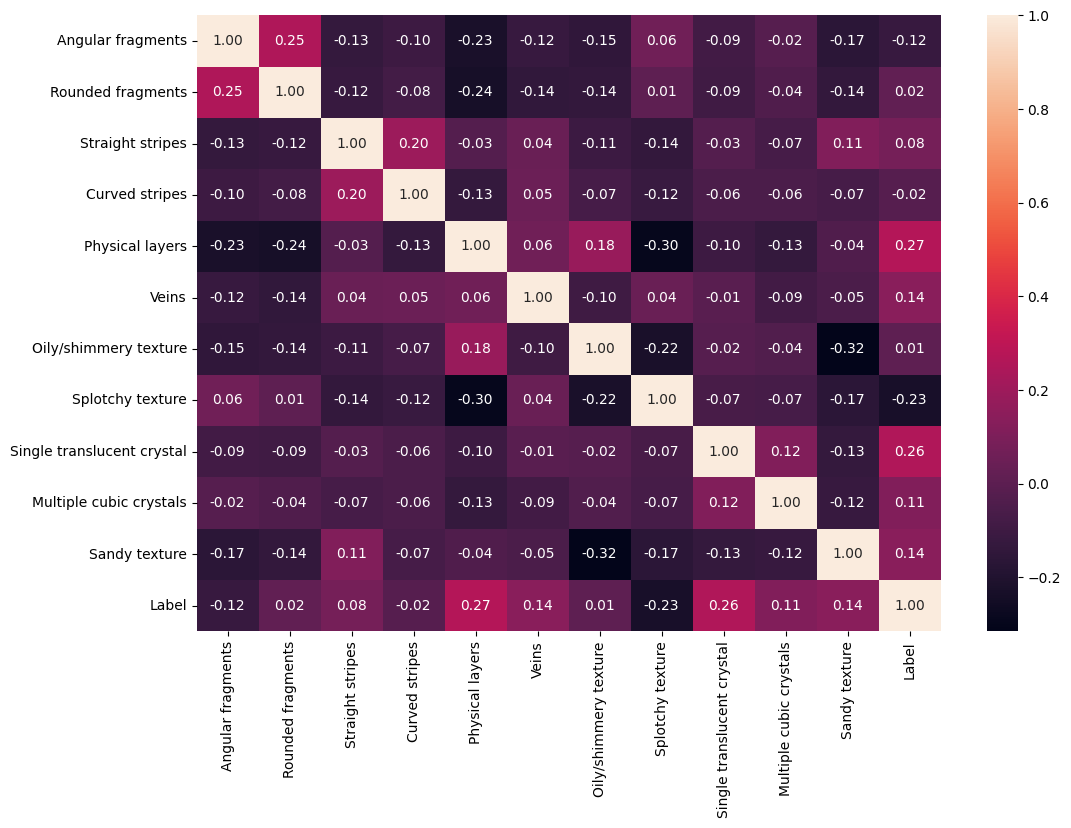

In [25]:
# PCC matrix for attributes and labels

correlation_features = hist_cols

plt.figure(figsize=(12, 8))
sns.heatmap(data[correlation_features].corr(), annot = True, fmt = ".2f")

# plt.xticks(rotation = 45)
plt.show()

In [26]:
data.head()

,Rock Number,Subtype number,Token number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Label
0,1,1,1,0.20,0.15,0.0,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10,1
1,2,1,2,0.65,0.15,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05,1
2,3,1,3,0.60,0.00,0.0,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05,1
3,4,1,4,0.10,0.85,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10,1
4,5,1,5,0.35,0.80,0.0,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05,1


In [27]:
# Train Test Validate Split

train_tokens = [ x for x in range(1, 11)]
validate_tokens = [x for x in range(11, 14)]
test_tokens = [x for x in range(14, 17)]

In [28]:
sclr = StandardScaler()

data[features] = sclr.fit_transform(data[features])

In [29]:
train_data = data[data["Token number"].isin(train_tokens)]
test_data = data[data["Token number"].isin(test_tokens)]
validate_data = data[data["Token number"].isin(validate_tokens)]

In [30]:
print("Shape of training data: ", train_data.shape)
print("Shape of test data: ", test_data.shape)
print("Shape of validate data: ", validate_data.shape)

Shape of training data:  (300, 15)
Shape of test data:  (90, 15)
Shape of validate data:  (90, 15)


In [31]:
# Checking the distribution of label in the splits to make sure the splits are representative of the data.

print("Target distribution in training data: ")
print(train_data["Label"].value_counts())

print("Target distribution in test data: ")
print(test_data["Label"].value_counts())

print("Target validate in training data: ")
print(validate_data["Label"].value_counts())

Target distribution in training data: 
Label
1    100
2    100
3    100
Name: count, dtype: int64
Target distribution in test data: 
Label
1    30
2    30
3    30
Name: count, dtype: int64
Target validate in training data: 
Label
1    30
2    30
3    30
Name: count, dtype: int64


In [32]:
data[features].describe()

,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
count,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02
mean,2.960595e-17,3.700743e-18,9.066821e-17,-5.181041e-17,1.776357e-16,3.700743e-18,1.665335e-17,-7.401487e-17,2.960595e-17,-7.401487e-18,-5.921189e-17
std,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00
min,-4.359233e-01,-4.062377e-01,-3.480619e-01,-2.630048e-01,-7.631187e-01,-5.108374e-01,-5.443583e-01,-8.417822e-01,-2.336924e-01,-2.240723e-01,-6.929248e-01
25%,-4.359233e-01,-4.062377e-01,-3.480619e-01,-2.630048e-01,-7.631187e-01,-5.108374e-01,-5.443583e-01,-8.417822e-01,-2.336924e-01,-2.240723e-01,-6.929248e-01
50%,-4.359233e-01,-4.062377e-01,-3.480619e-01,-2.630048e-01,-3.010309e-01,-5.108374e-01,-5.443583e-01,-2.467079e-01,-2.336924e-01,-2.240723e-01,-4.038548e-01
75%,-1.779169e-01,-1.529986e-01,-3.480619e-01,-2.630048e-01,2.188178e-01,-2.335837e-02,-1.675854e-01,3.483664e-01,-2.336924e-01,-2.240723e-01,1.742851e-01
max,4.724205e+00,4.658544e+00,4.790963e+00,5.955828e+00,3.626715e+00,8.263785e+00,3.223370e+00,4.811424e+00,7.146069e+00,8.701628e+00,5.088475e+00


In [33]:
X_train, y_train = train_data[features], train_data[label]
X_test, y_test = test_data[features], test_data[label]
X_validate, y_validate = validate_data[features], validate_data[label]

In [34]:
# Modelling

logreg = LogisticRegression(fit_intercept = True, multi_class = "multinomial", max_iter = 50)

logreg.fit(X_train, y_train)

# Evaluating on training data
train_preds = logreg.predict(X_train)
print("---------------------- Training Metrics ----------------------")
print("Accuracy: ", round(accuracy_score(y_train, train_preds), 3))
print("Precision: ", precision_score(y_train, train_preds, average = "macro").round(3))
print("Recall: ", recall_score(y_train, train_preds, average = "macro").round(3))
print("F1 Score: ", f1_score(y_train, train_preds, average = "macro").round(3))

# Evaluating on validation data
validate_preds = logreg.predict(X_validate)
print("---------------------- Validation Metrics ----------------------")
print("Accuracy: ", round(accuracy_score(y_validate, validate_preds), 3))
print("Precision: ", precision_score(y_validate, validate_preds, average = "macro").round(3))
print("Recall: ", recall_score(y_validate, validate_preds, average = "macro").round(3))
print("F1 Score: ", f1_score(y_validate, validate_preds, average = "macro").round(3))

---------------------- Training Metrics ----------------------
Accuracy:  0.67
Precision:  0.671
Recall:  0.67
F1 Score:  0.67
---------------------- Validation Metrics ----------------------
Accuracy:  0.756
Precision:  0.762
Recall:  0.756
F1 Score:  0.751


In [35]:
# Hyperparameters tuning

num_iterations, cs, solvers = [x for x in range(10, 51, 2)], [round(i * 0.01, 1) for i in range(10, 101, 10)], ["lbfgs", "newton-cg", "sag", "saga"] #other solvers are not supported for multinomial regression.

print("Number of iterations: ", num_iterations)
print("C: ", cs)
print("Solvers: ", solvers)

Number of iterations:  [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]
C:  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
Solvers:  ['lbfgs', 'newton-cg', 'sag', 'saga']


In [36]:
grid_df = pd.DataFrame(columns = ["Number of Iterations", "Train Precision", "Train Recall", "Train F1 Score", "Train Accuracy", 
                                  "Validation Precision", "Validation Recall", "Validation F1 Score", "Validation Accuracy"])

for num_itr in num_iterations:

    logreg = LogisticRegression(fit_intercept = True, multi_class = "multinomial", max_iter = num_itr)

    logreg.fit(X_train, y_train)

    train_preds = logreg.predict(X_train)

    train_pr = precision_score(y_train, train_preds, average = "macro").round(3)
    train_rec = recall_score(y_train, train_preds, average = "macro").round(3)
    train_f1_score = f1_score(y_train, train_preds, average = "macro").round(3)
    train_acc = round(accuracy_score(y_train, train_preds,), 3)

    validate_preds = logreg.predict(X_validate)

    valid_pr = precision_score(y_validate, validate_preds, average = "macro").round(3)
    valid_rec = recall_score(y_validate, validate_preds, average = "macro").round(3)
    valid_f1_score = f1_score(y_validate, validate_preds, average = "macro").round(3)
    valid_acc = round(accuracy_score(y_validate, validate_preds,), 3)

    curr_row = [num_itr, train_pr, train_rec, train_f1_score, train_acc, valid_pr, valid_rec, valid_f1_score, valid_acc]

    grid_df.loc[len(grid_df)] = curr_row

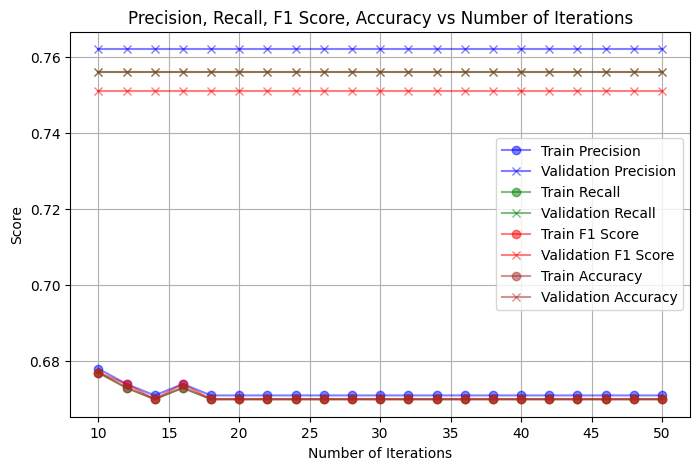

In [37]:
# Finding the best number of iterations

train_precision = grid_df["Train Precision"]
valid_precision = grid_df["Validation Precision"]
train_recall = grid_df["Train Recall"]
train_acc = grid_df["Train Accuracy"]

valid_recall = grid_df["Validation Recall"]
train_f1_score = grid_df["Train F1 Score"]
valid_f1_score = grid_df["Validation F1 Score"]
valid_acc = grid_df["Validation Accuracy"]

def create_combined_plot(x, train_precision, valid_precision, train_recall, valid_recall, train_f1_score, valid_f1_score, train_acc, valid_acc, parameter):

    plt.figure(figsize = (8, 5))

    # Precision
    plt.plot(x, train_precision, color = 'blue', label = 'Train Precision', marker = 'o', alpha = 0.5)
    plt.plot(x, valid_precision, color = 'blue', label = 'Validation Precision', marker = 'x', alpha = 0.5)

    # Recall
    plt.plot(x, train_recall, color = 'green', label = 'Train Recall', marker = 'o', alpha = 0.5)
    plt.plot(x, valid_recall, color = 'green', label = 'Validation Recall', marker = 'x', alpha = 0.5)

    # F1 Score
    plt.plot(x, train_f1_score, color = 'red', label = 'Train F1 Score', marker = 'o', alpha = 0.5)
    plt.plot(x, valid_f1_score, color = 'red', label = 'Validation F1 Score', marker = 'x', alpha = 0.5)

    # Accuracy
    plt.plot(x, train_acc, color = 'brown', label = 'Train Accuracy', marker = 'o', alpha = 0.5)
    plt.plot(x, valid_acc, color = 'brown', label = 'Validation Accuracy', marker = 'x', alpha = 0.5)

    plt.xlabel('{0}'.format(parameter))
    plt.ylabel('Score')
    plt.title('Precision, Recall, F1 Score, Accuracy vs {0}'.format(parameter))
    plt.legend(loc = 'best')
    plt.grid(True)

    plt.show()

create_combined_plot(grid_df["Number of Iterations"], train_precision, valid_precision, train_recall, valid_recall, train_f1_score, valid_f1_score, train_acc, valid_acc, "Number of Iterations")

We can take number of iterations as 30 as the metrics saturate after that.

In [38]:
grid_df = pd.DataFrame(columns = ["Number of Iterations", "Solver", 
                                  "Train Precision", "Train Recall", "Train F1 Score", "Train Accuracy", 
                                  "Validation Precision", "Validation Recall", "Validation F1 Score", "Validation Accuracy"])


# for c in cs:
for sol in solvers:

    logreg = LogisticRegression(fit_intercept = True, multi_class = "multinomial", max_iter = 30, solver = sol)

    logreg.fit(X_train, y_train)

    train_preds = logreg.predict(X_train)

    train_pr = precision_score(y_train, train_preds, average = "macro").round(3)
    train_rec = recall_score(y_train, train_preds, average = "macro").round(3)
    train_f1_score = f1_score(y_train, train_preds, average = "macro").round(3)
    train_acc = round(accuracy_score(y_train, train_preds,), 3)

    validate_preds = logreg.predict(X_validate)

    valid_pr = precision_score(y_validate, validate_preds, average = "macro").round(3)
    valid_rec = recall_score(y_validate, validate_preds, average = "macro").round(3)
    valid_f1_score = f1_score(y_validate, validate_preds, average = "macro").round(3)
    valid_acc = round(accuracy_score(y_validate, validate_preds,), 3)

    curr_row = [30, sol, train_pr, train_rec, train_f1_score, train_acc, valid_pr, valid_rec, valid_f1_score, valid_acc]

    grid_df.loc[len(grid_df)] = curr_row

In [39]:
grid_df

,Number of Iterations,Solver,Train Precision,Train Recall,Train F1 Score,Train Accuracy,Validation Precision,Validation Recall,Validation F1 Score,Validation Accuracy
0,30,lbfgs,0.671,0.67,0.67,0.67,0.762,0.756,0.751,0.756
1,30,newton-cg,0.671,0.67,0.67,0.67,0.762,0.756,0.751,0.756
2,30,sag,0.671,0.67,0.67,0.67,0.762,0.756,0.751,0.756
3,30,saga,0.671,0.67,0.67,0.67,0.762,0.756,0.751,0.756


All the solvers are giving exactly the same metrics.

In [40]:
grid_df = pd.DataFrame(columns = ["Number of Iterations", "Solver", "C",
                                  "Train Precision", "Train Recall", "Train F1 Score", "Train Accuracy", 
                                  "Validation Precision", "Validation Recall", "Validation F1 Score", "Validation Accuracy"])


for c in cs:

    logreg = LogisticRegression(fit_intercept = True, multi_class = "multinomial", max_iter = 30, solver = "lbfgs", C = c)

    logreg.fit(X_train, y_train)

    train_preds = logreg.predict(X_train)

    train_pr = precision_score(y_train, train_preds, average = "macro").round(3)
    train_rec = recall_score(y_train, train_preds, average = "macro").round(3)
    train_f1_score = f1_score(y_train, train_preds, average = "macro").round(3)
    train_acc = round(accuracy_score(y_train, train_preds,), 3)

    validate_preds = logreg.predict(X_validate)

    valid_pr = precision_score(y_validate, validate_preds, average = "macro").round(3)
    valid_rec = recall_score(y_validate, validate_preds, average = "macro").round(3)
    valid_f1_score = f1_score(y_validate, validate_preds, average = "macro").round(3)
    valid_acc = round(accuracy_score(y_validate, validate_preds,), 3)

    curr_row = [30, "lbfgs", c, train_pr, train_rec, train_f1_score, train_acc, valid_pr, valid_rec, valid_f1_score, valid_acc]

    grid_df.loc[len(grid_df)] = curr_row

In [41]:
grid_df

,Number of Iterations,Solver,C,Train Precision,Train Recall,Train F1 Score,Train Accuracy,Validation Precision,Validation Recall,Validation F1 Score,Validation Accuracy
0,30,lbfgs,0.1,0.664,0.663,0.664,0.663,0.752,0.744,0.740,0.744
1,30,lbfgs,0.2,0.661,0.660,0.660,0.660,0.767,0.756,0.750,0.756
2,30,lbfgs,0.3,0.665,0.663,0.664,0.663,0.777,0.767,0.762,0.767
3,30,lbfgs,0.4,0.671,0.670,0.670,0.670,0.777,0.767,0.762,0.767
4,30,lbfgs,0.5,0.671,0.670,0.670,0.670,0.777,0.767,0.762,0.767
5,30,lbfgs,0.6,0.671,0.670,0.670,0.670,0.777,0.767,0.762,0.767
6,30,lbfgs,0.7,0.667,0.667,0.667,0.667,0.762,0.756,0.751,0.756
7,30,lbfgs,0.8,0.671,0.670,0.670,0.670,0.762,0.756,0.751,0.756
8,30,lbfgs,0.9,0.671,0.670,0.670,0.670,0.762,0.756,0.751,0.756
9,30,lbfgs,1.0,0.671,0.670,0.670,0.670,0.762,0.756,0.751,0.756


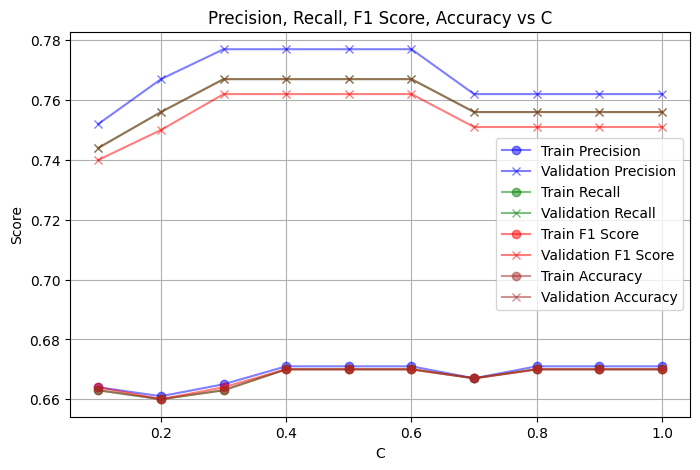

In [42]:
train_precision = grid_df["Train Precision"]
valid_precision = grid_df["Validation Precision"]
train_recall = grid_df["Train Recall"]
train_acc = grid_df["Train Accuracy"]

valid_recall = grid_df["Validation Recall"]
train_f1_score = grid_df["Train F1 Score"]
valid_f1_score = grid_df["Validation F1 Score"]
valid_acc = grid_df["Validation Accuracy"]

create_combined_plot(grid_df["C"], train_precision, valid_precision, train_recall, valid_recall, train_f1_score, valid_f1_score, train_acc, valid_acc, "C")

Best performance is around C = 0.5

Hyperparameters selected for logistic regression:

Number of Iterations: 30

C = 0.5

Solver = lbfgs

## SVM

In [43]:
svm_model = SVC()

svm_model.fit(X = X_train, y = y_train)

# Evaluating on training data
train_preds = svm_model.predict(X_train)
print("---------------------- Training Metrics ----------------------")
print("Accuracy: ", round(accuracy_score(y_train, train_preds), 3))
print("Precision: ", precision_score(y_train, train_preds, average = "macro").round(3))
print("Recall: ", recall_score(y_train, train_preds, average = "macro").round(3))
print("F1 Score: ", f1_score(y_train, train_preds, average = "macro").round(3))

# Evaluating on validation data
validate_preds = svm_model.predict(X_validate)
print("---------------------- Validation Metrics ----------------------")
print("Accuracy: ", round(accuracy_score(y_validate, validate_preds), 3))
print("Precision: ", precision_score(y_validate, validate_preds, average = "macro").round(3))
print("Recall: ", recall_score(y_validate, validate_preds, average = "macro").round(3))
print("F1 Score: ", f1_score(y_validate, validate_preds, average = "macro").round(3))

---------------------- Training Metrics ----------------------
Accuracy:  0.737
Precision:  0.74
Recall:  0.737
F1 Score:  0.737
---------------------- Validation Metrics ----------------------
Accuracy:  0.767
Precision:  0.772
Recall:  0.767
F1 Score:  0.768


In [44]:
# Hyper Parameters

cs = [0.001, 0.001, 0.1, 1, 10]
gamma = [round(x * 0.01, 3) for x in range(0, 101, 10)]
kernels = ["linear", "poly", "rbf"]
poly_kernel_degrees = [1, 2, 3]

gamma

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [45]:
svm_grid_df = pd.DataFrame(columns = ["C", "Train Precision", "Train Recall", "Train F1 Score", "Train Accuracy", 
                                  "Validation Precision", "Validation Recall", "Validation F1 Score", "Validation Accuracy"])

for c in cs:

    svm_model = SVC(C = c)

    svm_model.fit(X_train, y_train)

    train_preds = svm_model.predict(X_train)

    train_pr = precision_score(y_train, train_preds, average = "macro").round(3)
    train_rec = recall_score(y_train, train_preds, average = "macro").round(3)
    train_f1_score = f1_score(y_train, train_preds, average = "macro").round(3)
    train_acc = round(accuracy_score(y_train, train_preds,), 3)

    validate_preds = svm_model.predict(X_validate)

    valid_pr = precision_score(y_validate, validate_preds, average = "macro").round(3)
    valid_rec = recall_score(y_validate, validate_preds, average = "macro").round(3)
    valid_f1_score = f1_score(y_validate, validate_preds, average = "macro").round(3)
    valid_acc = round(accuracy_score(y_validate, validate_preds,), 3)

    curr_row = [c, train_pr, train_rec, train_f1_score, train_acc, valid_pr, valid_rec, valid_f1_score, valid_acc]

    svm_grid_df.loc[len(svm_grid_df)] = curr_row

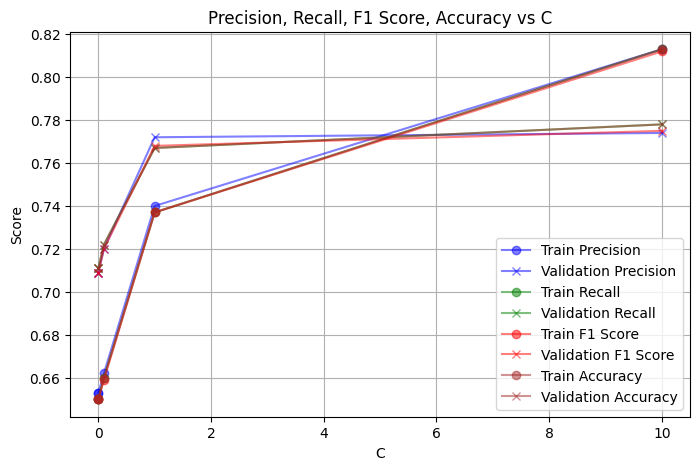

In [46]:
train_precision = svm_grid_df["Train Precision"]
valid_precision = svm_grid_df["Validation Precision"]
train_recall = svm_grid_df["Train Recall"]
train_acc = svm_grid_df["Train Accuracy"]

valid_recall = svm_grid_df["Validation Recall"]
train_f1_score = svm_grid_df["Train F1 Score"]
valid_f1_score = svm_grid_df["Validation F1 Score"]
valid_acc = svm_grid_df["Validation Accuracy"]

create_combined_plot(svm_grid_df["C"], train_precision, valid_precision, train_recall, valid_recall, train_f1_score, valid_f1_score, train_acc, valid_acc, "C")

In [47]:
# Checking Gamma which is for rbf and poly kernels only.

svm_grid_df = pd.DataFrame(columns = ["C", "Gamma", "Train Precision", "Train Recall", "Train F1 Score", "Train Accuracy", 
                                  "Validation Precision", "Validation Recall", "Validation F1 Score", "Validation Accuracy"])

for g in gamma:

    svm_model = SVC(C = 1, gamma = g)

    svm_model.fit(X_train, y_train)

    train_preds = svm_model.predict(X_train)

    train_pr = precision_score(y_train, train_preds, average = "macro").round(3)
    train_rec = recall_score(y_train, train_preds, average = "macro").round(3)
    train_f1_score = f1_score(y_train, train_preds, average = "macro").round(3)
    train_acc = round(accuracy_score(y_train, train_preds,), 3)

    validate_preds = svm_model.predict(X_validate)

    valid_pr = precision_score(y_validate, validate_preds, average = "macro").round(3)
    valid_rec = recall_score(y_validate, validate_preds, average = "macro").round(3)
    valid_f1_score = f1_score(y_validate, validate_preds, average = "macro").round(3)
    valid_acc = round(accuracy_score(y_validate, validate_preds,), 3)

    curr_row = [1, g, train_pr, train_rec, train_f1_score, train_acc, valid_pr, valid_rec, valid_f1_score, valid_acc]

    svm_grid_df.loc[len(svm_grid_df)] = curr_row

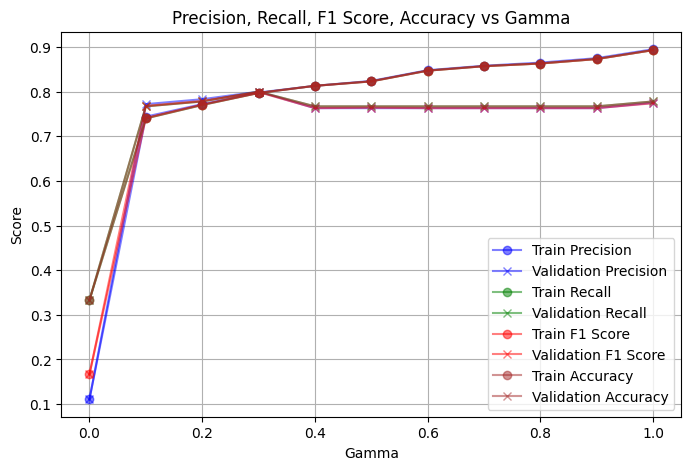

In [48]:
train_precision = svm_grid_df["Train Precision"]
valid_precision = svm_grid_df["Validation Precision"]
train_recall = svm_grid_df["Train Recall"]
train_acc = svm_grid_df["Train Accuracy"]

valid_recall = svm_grid_df["Validation Recall"]
train_f1_score = svm_grid_df["Train F1 Score"]
valid_f1_score = svm_grid_df["Validation F1 Score"]
valid_acc = svm_grid_df["Validation Accuracy"]

create_combined_plot(svm_grid_df["Gamma"], train_precision, valid_precision, train_recall, valid_recall, train_f1_score, valid_f1_score, train_acc, valid_acc, "Gamma")

In [49]:
# Checking different kernels

svm_grid_df = pd.DataFrame(columns = ["C", "Kernel", "Train Precision", "Train Recall", "Train F1 Score", "Train Accuracy", 
                                  "Validation Precision", "Validation Recall", "Validation F1 Score", "Validation Accuracy"])

for k in kernels:

    if k == "linear":
        svm_model = SVC(C = 1, kernel = k)
    else:
        svm_model = SVC(C = 1, kernel = k, gamma = 0.3)

    svm_model.fit(X_train, y_train)

    train_preds = svm_model.predict(X_train)

    train_pr = precision_score(y_train, train_preds, average = "macro").round(3)
    train_rec = recall_score(y_train, train_preds, average = "macro").round(3)
    train_f1_score = f1_score(y_train, train_preds, average = "macro").round(3)
    train_acc = round(accuracy_score(y_train, train_preds,), 3)

    validate_preds = svm_model.predict(X_validate)

    valid_pr = precision_score(y_validate, validate_preds, average = "macro").round(3)
    valid_rec = recall_score(y_validate, validate_preds, average = "macro").round(3)
    valid_f1_score = f1_score(y_validate, validate_preds, average = "macro").round(3)
    valid_acc = round(accuracy_score(y_validate, validate_preds,), 3)

    curr_row = [1, k, train_pr, train_rec, train_f1_score, train_acc, valid_pr, valid_rec, valid_f1_score, valid_acc]

    svm_grid_df.loc[len(svm_grid_df)] = curr_row

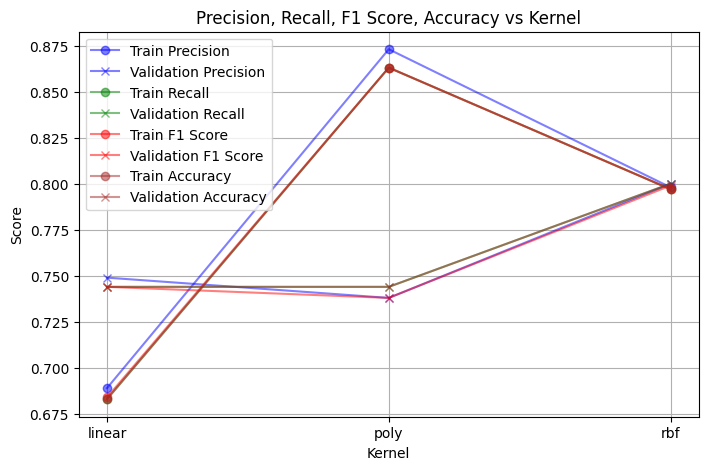

In [50]:
train_precision = svm_grid_df["Train Precision"]
valid_precision = svm_grid_df["Validation Precision"]
train_recall = svm_grid_df["Train Recall"]
train_acc = svm_grid_df["Train Accuracy"]

valid_recall = svm_grid_df["Validation Recall"]
train_f1_score = svm_grid_df["Train F1 Score"]
valid_f1_score = svm_grid_df["Validation F1 Score"]
valid_acc = svm_grid_df["Validation Accuracy"]

create_combined_plot(svm_grid_df["Kernel"], train_precision, valid_precision, train_recall, valid_recall, train_f1_score, valid_f1_score, train_acc, valid_acc, "Kernel")

In [51]:
# Polynomial Kernels

# Checking different kernels

svm_grid_df = pd.DataFrame(columns = ["C", "Kernel", "Degree", "Train Precision", "Train Recall", "Train F1 Score", "Train Accuracy", 
                                  "Validation Precision", "Validation Recall", "Validation F1 Score", "Validation Accuracy"])

for deg in poly_kernel_degrees:

    svm_model = SVC(C = 1, kernel = "poly", gamma = 0.3, degree = deg)

    svm_model.fit(X_train, y_train)

    train_preds = svm_model.predict(X_train)

    train_pr = precision_score(y_train, train_preds, average = "macro").round(3)
    train_rec = recall_score(y_train, train_preds, average = "macro").round(3)
    train_f1_score = f1_score(y_train, train_preds, average = "macro").round(3)
    train_acc = round(accuracy_score(y_train, train_preds,), 3)

    validate_preds = svm_model.predict(X_validate)

    valid_pr = precision_score(y_validate, validate_preds, average = "macro").round(3)
    valid_rec = recall_score(y_validate, validate_preds, average = "macro").round(3)
    valid_f1_score = f1_score(y_validate, validate_preds, average = "macro").round(3)
    valid_acc = round(accuracy_score(y_validate, validate_preds,), 3)

    curr_row = [1, "Polynomial", deg, train_pr, train_rec, train_f1_score, train_acc, valid_pr, valid_rec, valid_f1_score, valid_acc]

    svm_grid_df.loc[len(svm_grid_df)] = curr_row

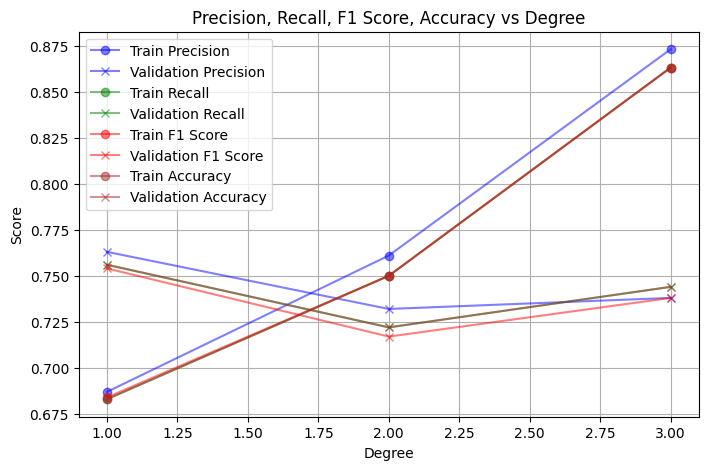

In [52]:
train_precision = svm_grid_df["Train Precision"]
valid_precision = svm_grid_df["Validation Precision"]
train_recall = svm_grid_df["Train Recall"]
train_acc = svm_grid_df["Train Accuracy"]

valid_recall = svm_grid_df["Validation Recall"]
train_f1_score = svm_grid_df["Train F1 Score"]
valid_f1_score = svm_grid_df["Validation F1 Score"]
valid_acc = svm_grid_df["Validation Accuracy"]

create_combined_plot(svm_grid_df["Degree"], train_precision, valid_precision, train_recall, valid_recall, train_f1_score, valid_f1_score, train_acc, valid_acc, "Degree")

Hyperparameters for SVM:

Kernel: RBF

C: 1

Gamma: 0.3

Random Forest

In [53]:
X_pre_defined = np.concatenate((X_train, X_validate), axis=0)
y_pre_defined = np.concatenate((y_train, y_validate), axis=0)

split_index = [-1] * len(X_train) + [0] * len(X_validate)
predefined_split = PredefinedSplit(test_fold = split_index)

param_grid = {
    'n_estimators' : [50, 100, 150, 200],
    'max_depth' : [2, 4, 8, 16, 32],
    'min_samples_split' : [2, 5, 10, 20],
    'min_samples_leaf' : [2, 4, 8, 16, 32, 64]
}

rf = RandomForestClassifier(random_state = 10)

grid_search = GridSearchCV(rf, param_grid, cv = predefined_split, scoring = 'accuracy', verbose = 1)

grid_search.fit(X_pre_defined, y_pre_defined)

best_random_forest = grid_search.best_estimator_

Fitting 1 folds for each of 480 candidates, totalling 480 fits


In [54]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [55]:
# Evaluating on training data
train_preds = best_random_forest.predict(X_train)
print("---------------------- Training Metrics ----------------------")
print("Accuracy: ", round(accuracy_score(y_train, train_preds), 3))
print("Precision: ", precision_score(y_train, train_preds, average = "macro").round(3))
print("Recall: ", recall_score(y_train, train_preds, average = "macro").round(3))
print("F1 Score: ", f1_score(y_train, train_preds, average = "macro").round(3))

# Evaluating on validation data
validate_preds = best_random_forest.predict(X_validate)
print("---------------------- Validation Metrics ----------------------")
print("Accuracy: ", round(accuracy_score(y_validate, validate_preds), 3))
print("Precision: ", precision_score(y_validate, validate_preds, average = "macro").round(3))
print("Recall: ", recall_score(y_validate, validate_preds, average = "macro").round(3))
print("F1 Score: ", f1_score(y_validate, validate_preds, average = "macro").round(3))

---------------------- Training Metrics ----------------------
Accuracy:  0.89
Precision:  0.891
Recall:  0.89
F1 Score:  0.89
---------------------- Validation Metrics ----------------------
Accuracy:  0.922
Precision:  0.923
Recall:  0.922
F1 Score:  0.922


In [56]:
feature_imps = list(best_random_forest.feature_importances_)
fi_df = pd.DataFrame(columns = ["Feature", "Importance"])

for itr in range(len(X_train.columns)):
    curr_row = [X_train.columns[itr], feature_imps[itr]]
    fi_df.loc[len(fi_df)] = curr_row

In [57]:
fi_df.sort_values(by = ["Importance"], ascending = False)

,Feature,Importance
4,Physical layers,0.154484
10,Sandy texture,0.138821
7,Splotchy texture,0.113991
0,Angular fragments,0.111770
5,Veins,0.084969
8,Single translucent crystal,0.084039
2,Straight stripes,0.080928
1,Rounded fragments,0.075261
6,Oily/shimmery texture,0.075220
3,Curved stripes,0.047314


Best Parameter:

Max Depth: 8

Min Samples Leaf: 2

Min Samples Split: 2

Number of Estimators: 50

Ensemble of Models

In [58]:
# Best logistic regression model
best_logreg = LogisticRegression(fit_intercept = True, multi_class = "multinomial", max_iter = 30, solver = "lbfgs", C = 0.5, random_state = 10)
best_logreg.fit(X = X_train, y = y_train)

# Best SVM model
best_svm = SVC(C = 1, kernel = 'rbf', gamma = 0.3, random_state = 10, probability = True)
best_svm.fit(X = X_train, y = y_train)

# Best Random Forest model
# best_random_forest = RandomForestClassifier(random_state = 10, max_depth = 8, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 50)
# best_random_forest.fit(X = X_train, y = y_train)

SVC(C=1, gamma=0.3, probability=True, random_state=10)

In [59]:
models = [("lr", best_logreg), ("svm", best_svm), ("rf", best_random_forest)]

In [60]:
vc_hard = VotingClassifier(estimators = models, voting = 'hard')

vc_hard.fit(X_train, y_train)

# Evaluating on training data
train_preds = vc_hard.predict(X_train)
print("---------------------- Training Metrics ----------------------")
print("Accuracy: ", round(accuracy_score(y_train, train_preds), 3))
print("Precision: ", precision_score(y_train, train_preds, average = "macro").round(3))
print("Recall: ", recall_score(y_train, train_preds, average = "macro").round(3))
print("F1 Score: ", f1_score(y_train, train_preds, average = "macro").round(3))

# Evaluating on validation data
validate_preds = vc_hard.predict(X_validate)
print("---------------------- Validation Metrics ----------------------")
print("Accuracy: ", round(accuracy_score(y_validate, validate_preds), 3))
print("Precision: ", precision_score(y_validate, validate_preds, average = "macro").round(3))
print("Recall: ", recall_score(y_validate, validate_preds, average = "macro").round(3))
print("F1 Score: ", f1_score(y_validate, validate_preds, average = "macro").round(3))

---------------------- Training Metrics ----------------------
Accuracy:  0.81
Precision:  0.812
Recall:  0.81
F1 Score:  0.811
---------------------- Validation Metrics ----------------------
Accuracy:  0.778
Precision:  0.777
Recall:  0.778
F1 Score:  0.776


In [61]:
vc_soft = VotingClassifier(estimators = models, voting = 'soft')

vc_soft.fit(X_train, y_train)

# Evaluating on training data
train_preds = vc_soft.predict(X_train)
print("---------------------- Training Metrics ----------------------")
print("Accuracy: ", round(accuracy_score(y_train, train_preds), 3))
print("Precision: ", precision_score(y_train, train_preds, average = "macro").round(3))
print("Recall: ", recall_score(y_train, train_preds, average = "macro").round(3))
print("F1 Score: ", f1_score(y_train, train_preds, average = "macro").round(3))

# Evaluating on validation data
validate_preds = vc_soft.predict(X_validate)
print("---------------------- Validation Metrics ----------------------")
print("Accuracy: ", round(accuracy_score(y_validate, validate_preds), 3))
print("Precision: ", precision_score(y_validate, validate_preds, average = "macro").round(3))
print("Recall: ", recall_score(y_validate, validate_preds, average = "macro").round(3))
print("F1 Score: ", f1_score(y_validate, validate_preds, average = "macro").round(3))

---------------------- Training Metrics ----------------------
Accuracy:  0.813
Precision:  0.816
Recall:  0.813
F1 Score:  0.814
---------------------- Validation Metrics ----------------------
Accuracy:  0.778
Precision:  0.777
Recall:  0.778
F1 Score:  0.776


In [62]:
comp = {
    "Models" : ["Logistic Regression", "SVM", "Random Forest", "Hard Margin Ensemble", "Soft Margin Ensemble"],
    "Train Precision" : [0.671, 0.798, 0.891, 0.812, 0.816],
    "Train Recall" : [0.67, 0.797, 0.89, 0.81, 0.813],
    "Train F1 Score" : [0.67, 0.797, 0.89, 0.811, 0.813],
    "Train Accuracy" : [0.67, 0.797, 0.89, 0.81, 0.813],
    "Validation Precision" : [0.767, 0.8, 0.922, 0.777, 0.777],
    "Validation Recall" : [0.777, 0.8, 0.923, 0.778, 0.778],
    "Validation F1 Score" : [0.767, 0.8, 0.922, 0.776, 0.776],
    "Validation Accuracy" : [0.762, 0.799, 0.922, 0.778, 0.778],
}

comparison_df = pd.DataFrame(comp)

In [63]:
comparison_df

,Models,Train Precision,Train Recall,Train F1 Score,Train Accuracy,Validation Precision,Validation Recall,Validation F1 Score,Validation Accuracy
0,Logistic Regression,0.671,0.670,0.670,0.670,0.767,0.777,0.767,0.762
1,SVM,0.798,0.797,0.797,0.797,0.800,0.800,0.800,0.799
2,Random Forest,0.891,0.890,0.890,0.890,0.922,0.923,0.922,0.922
3,Hard Margin Ensemble,0.812,0.810,0.811,0.810,0.777,0.778,0.776,0.778
4,Soft Margin Ensemble,0.816,0.813,0.813,0.813,0.777,0.778,0.776,0.778


By looking at the metrics, the best model seems to be the Random Forest classifier. But Soft Margin Ensemble is also giving good results, hence we will generate test predictions with both of them.

In [64]:
# Evaluating on test data
test_preds = best_random_forest.predict(X_test)
print("---------------------- Test Metrics ----------------------")
print("Accuracy: ", round(accuracy_score(y_test, test_preds), 3))
print("Precision: ", precision_score(y_test, test_preds, average = "macro").round(3))
print("Recall: ", recall_score(y_test, test_preds, average = "macro").round(3))
print("F1 Score: ", f1_score(y_test, test_preds, average = "macro").round(3))

---------------------- Test Metrics ----------------------
Accuracy:  0.7
Precision:  0.701
Recall:  0.7
F1 Score:  0.698


In [65]:
# Evaluating on test data
test_preds = vc_soft.predict(X_test)
print("---------------------- Test Metrics ----------------------")
print("Accuracy: ", round(accuracy_score(y_test, test_preds), 3))
print("Precision: ", precision_score(y_test, test_preds, average = "macro").round(3))
print("Recall: ", recall_score(y_test, test_preds, average = "macro").round(3))
print("F1 Score: ", f1_score(y_test, test_preds, average = "macro").round(3))

---------------------- Test Metrics ----------------------
Accuracy:  0.711
Precision:  0.713
Recall:  0.711
F1 Score:  0.71


Soft margin ensemble is working better on the test data.

In [66]:
human_preds = pd.read_csv("trialData.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'trialData.csv'

In [ ]:
human_preds.shape

(88547, 12)

In [ ]:
human_preds.head()

,subid,block,trial,rocknumber,category,subtype,token,type,catresponse,recresponse,cat_correct,rec_correct
0,A1HUMXQ7SEXD8E,1,1,331,Sedimentary,Bituminous Coal,11,NonparentTraining,Metamorphic,NaN,0,NaN
1,A1HUMXQ7SEXD8E,1,2,398,Sedimentary,Dolomite,14,NonparentTraining,Igneous,NaN,0,NaN
2,A1HUMXQ7SEXD8E,1,3,19,Igneous,Basalt,3,NonparentTraining,Sedimentary,NaN,0,NaN
3,A1HUMXQ7SEXD8E,1,4,338,Sedimentary,Breccia,2,NonparentTraining,Metamorphic,NaN,0,NaN
4,A1HUMXQ7SEXD8E,1,5,60,Igneous,Gabbro,12,NonparentTraining,Sedimentary,NaN,0,NaN


In [ ]:
human_preds['block'].value_counts()

block
4    44274
3    14769
2    14755
1    14749
Name: count, dtype: int64

In [ ]:
human_preds = human_preds[human_preds["rocknumber"].isin(list(range(1, 481)))]
human_preds.shape

(83627, 12)

In [ ]:
train_human_preds = human_preds[human_preds["block"].isin([1, 2, 3])]
test_human_preds = human_preds[human_preds["block"].isin([4])]

In [ ]:
train_human_preds.shape

(44273, 12)

In [ ]:
test_human_preds.shape

(39354, 12)

In [ ]:
print("---------------------- Train Metrics ----------------------")
print(round(train_human_preds["cat_correct"].mean(), 3))

print("---------------------- Test Metrics ----------------------")
print(round(test_human_preds["cat_correct"].mean(), 3))

---------------------- Train Metrics ----------------------
0.56
---------------------- Test Metrics ----------------------
0.598


Accuracy Comparison with the best model which is Soft Voting Classifier:

Soft Margin Ensemble Train Accuracy : 0.813

Human Train Accuracy : 0.56

Soft Margin Ensemble Test Accuracy : 0.711

Human Test Accuracy : 0.598

The soft margin ensemble accuracy does better than humans in accuracy.

In [ ]:
data

,Rock Number,Subtype number,Token number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Label
0,1,1,1,0.596102,0.353480,-0.348062,-0.263005,-0.763119,-0.023358,-0.544358,0.943441,-0.233692,-0.224072,-0.114785,1
1,2,1,2,2.918160,0.353480,-0.348062,-0.263005,-0.532075,-0.510837,-0.544358,-0.246708,-0.233692,0.222213,-0.403855,1
2,3,1,3,2.660153,-0.406238,-0.348062,-0.263005,-0.532075,-0.510837,-0.544358,1.240978,-0.233692,-0.224072,-0.403855,1
3,4,1,4,0.080089,3.898827,-0.348062,-0.263005,-0.532075,-0.510837,-0.544358,-0.246708,-0.233692,-0.224072,-0.114785,1
4,5,1,5,1.370121,3.645588,-0.348062,-0.263005,-0.763119,-0.510837,-0.544358,-0.246708,-0.233692,-0.224072,-0.403855,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,476,30,12,-0.435923,-0.406238,-0.348062,-0.263005,2.009408,-0.023358,-0.544358,-0.841782,-0.233692,-0.224072,1.041495,3
476,477,30,13,-0.435923,-0.406238,-0.348062,-0.263005,1.085232,-0.510837,-0.544358,-0.544245,-0.233692,-0.224072,1.330565,3
477,478,30,14,-0.435923,-0.406238,-0.348062,-0.263005,1.316276,-0.023358,-0.544358,-0.544245,-0.233692,-0.224072,0.463355,3
478,479,30,15,-0.435923,-0.406238,-0.348062,-0.263005,1.085232,0.464121,-0.544358,-0.246708,-0.233692,-0.224072,0.463355,3


In [ ]:
human_preds

,subid,block,trial,rocknumber,category,subtype,token,type,catresponse,recresponse,cat_correct,rec_correct
0,A1HUMXQ7SEXD8E,1,1,331,Sedimentary,Bituminous Coal,11,NonparentTraining,Metamorphic,NaN,0,NaN
1,A1HUMXQ7SEXD8E,1,2,398,Sedimentary,Dolomite,14,NonparentTraining,Igneous,NaN,0,NaN
2,A1HUMXQ7SEXD8E,1,3,19,Igneous,Basalt,3,NonparentTraining,Sedimentary,NaN,0,NaN
3,A1HUMXQ7SEXD8E,1,4,338,Sedimentary,Breccia,2,NonparentTraining,Metamorphic,NaN,0,NaN
4,A1HUMXQ7SEXD8E,1,5,60,Igneous,Gabbro,12,NonparentTraining,Sedimentary,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
88541,A2FXYZE13N65FJ,4,1075,247,Metamorphic,Migmatite,7,NonparentTraining,Metamorphic,Yes,1,1.0
88542,A2FXYZE13N65FJ,4,1076,366,Sedimentary,Chert,14,StandardTransfer,Sedimentary,No,1,1.0
88543,A2FXYZE13N65FJ,4,1077,412,Sedimentary,Micrite,12,StandardTransfer,Sedimentary,No,1,1.0
88544,A2FXYZE13N65FJ,4,1078,476,Sedimentary,Shale,12,NonparentTraining,Metamorphic,Yes,0,1.0


In [ ]:
human_preds["rocknumber"].value_counts()

rocknumber
51     329
437    329
27     329
103    329
80     329
      ... 
248     82
90      82
191     81
94      81
6       81
Name: count, Length: 480, dtype: int64